In [3]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2023-07-07 10:48:14--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt.1’

names.txt.1         100%[===================>] 222.80K  --.-KB/s    in 0.01s   

2023-07-07 10:48:14 (20.2 MB/s) - ‘names.txt.1’ saved [228145/228145]



In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
words = open('names.txt').read().splitlines()
print(len(words))
words[:6]

32033


['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte']

In [6]:
chars = sorted(list(set('.' + ''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
itos = {i:s for i,s in enumerate(chars)}
print(itos)
print(stoi)

{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}
{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [77]:
chars

['.',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [7]:
# build the dataset

block_size = 3
X, Y = [], []

for w in words[:5]:
  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', ch)
    context = context[1:] + [ix]

X = tf.constant(X)
Y = tf.constant(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [8]:
X.shape, Y.shape, X.dtype, Y.dtype

(TensorShape([32, 3]), TensorShape([32]), tf.int32, tf.int32)

In [9]:
embed_size = 2
C = tf.Variable(tf.random.normal((27, embed_size)), name = 'embedings')

In [10]:
C

<tf.Variable 'embedings:0' shape=(27, 2) dtype=float32, numpy=
array([[-0.9521539 , -0.67417485],
       [ 2.0701635 , -0.7613406 ],
       [ 1.9830511 ,  1.7383884 ],
       [ 0.46034968,  0.39671266],
       [ 0.09764323,  2.0108995 ],
       [-1.0729713 , -0.34305072],
       [-1.3854414 , -1.2964383 ],
       [-0.31035566, -1.9458215 ],
       [-0.18729673,  1.6958696 ],
       [ 0.2030841 ,  1.7798976 ],
       [-0.6404352 , -0.725254  ],
       [ 1.3067636 ,  1.877262  ],
       [ 1.7885995 , -1.568478  ],
       [-0.1529337 ,  0.22693501],
       [-0.01042981,  1.1538078 ],
       [ 0.0284067 , -0.6604427 ],
       [-0.02453009,  0.42048395],
       [-0.80596256,  0.36039984],
       [-0.12683931,  0.32788146],
       [-0.12087645, -0.16399306],
       [-2.5386822 , -0.44809863],
       [-0.49130484, -0.74196494],
       [-0.4690692 ,  1.049781  ],
       [-0.86231214, -0.66553694],
       [ 0.29194584,  1.0656276 ],
       [-1.185251  ,  0.07844309],
       [-2.3431773 , -0.658

In [11]:
tf.one_hot([1], depth=27) @ C

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 2.0701635, -0.7613406]], dtype=float32)>

In [12]:
C[1, tf.newaxis]

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 2.0701635, -0.7613406]], dtype=float32)>

In [13]:
X.shape, X[:5]

(TensorShape([32, 3]),
 <tf.Tensor: shape=(5, 3), dtype=int32, numpy=
 array([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1]], dtype=int32)>)

In [14]:
tf.gather(C, X[:3])

<tf.Tensor: shape=(3, 3, 2), dtype=float32, numpy=
array([[[-0.9521539 , -0.67417485],
        [-0.9521539 , -0.67417485],
        [-0.9521539 , -0.67417485]],

       [[-0.9521539 , -0.67417485],
        [-0.9521539 , -0.67417485],
        [-1.0729713 , -0.34305072]],

       [[-0.9521539 , -0.67417485],
        [-1.0729713 , -0.34305072],
        [-0.1529337 ,  0.22693501]]], dtype=float32)>

In [15]:
import timeit
duration1 = timeit.timeit(lambda: tf.one_hot([1], depth=27) @ C, number=10000)
duration2 = timeit.timeit(lambda:  tf.gather(C, X), number=10000)
print(f'{duration1=}s, {duration2=}s')

duration1=6.043831506000004s, duration2=1.4686610410000043s


In [16]:
emb = tf.gather(C, X)
emb.shape

TensorShape([32, 3, 2])

In [17]:
emb[:2]

<tf.Tensor: shape=(2, 3, 2), dtype=float32, numpy=
array([[[-0.9521539 , -0.67417485],
        [-0.9521539 , -0.67417485],
        [-0.9521539 , -0.67417485]],

       [[-0.9521539 , -0.67417485],
        [-0.9521539 , -0.67417485],
        [-1.0729713 , -0.34305072]]], dtype=float32)>

In [18]:
emb = tf.reshape(emb, (emb.shape[0], -1))

In [19]:
emb[:2]

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[-0.9521539 , -0.67417485, -0.9521539 , -0.67417485, -0.9521539 ,
        -0.67417485],
       [-0.9521539 , -0.67417485, -0.9521539 , -0.67417485, -1.0729713 ,
        -0.34305072]], dtype=float32)>

In [20]:
W1 = tf.Variable(tf.random.normal((embed_size*block_size, 100)))
b1 = tf.Variable(tf.zeros((1, 100)))
W1.shape, b1.shape, W1.dtype, b1.dtype

(TensorShape([6, 100]), TensorShape([1, 100]), tf.float32, tf.float32)

In [21]:
h = tf.math.tanh(emb @ W1 + b1)

In [22]:
h

<tf.Tensor: shape=(32, 100), dtype=float32, numpy=
array([[-0.39269683,  0.9969044 , -0.9995136 , ..., -0.94327366,
        -0.99936616, -0.336682  ],
       [-0.10376655,  0.99695355, -0.99958295, ..., -0.9332468 ,
        -0.9994318 , -0.43255544],
       [-0.45500985,  0.9983383 , -0.98620236, ..., -0.36056975,
        -0.9680389 ,  0.60148144],
       ...,
       [ 0.8550604 ,  0.60261726, -0.2714849 , ...,  0.7298691 ,
         0.34298596,  0.40772575],
       [ 0.62449425, -0.15028638,  0.940124  , ...,  0.6570931 ,
         0.95719093,  0.9355019 ],
       [-0.9663875 , -0.94008756,  0.99998575, ...,  0.8583946 ,
         0.99981904,  0.9866783 ]], dtype=float32)>

In [23]:
W2 = tf.Variable(tf.random.normal((100, 27)))
b2 = tf.Variable(tf.zeros((1, 27)))
W2.shape, b2.shape, W2.dtype, b2.dtype

(TensorShape([100, 27]), TensorShape([1, 27]), tf.float32, tf.float32)

In [24]:
logits = h @ W2 + b2

In [25]:
logits.shape

TensorShape([32, 27])

In [26]:
counts = tf.math.exp(logits)
probs = counts / tf.reduce_sum(counts, axis=1, keepdims=True)
probs.shape

TensorShape([32, 27])

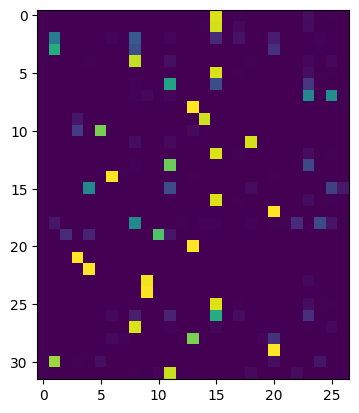

In [27]:
plt.imshow(probs)

In [28]:
Y

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9,
       19,  1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0],
      dtype=int32)>

In [29]:
loss = -tf.reduce_mean(tf.math.log(tf.gather(probs, indices=Y, batch_dims=1)))

In [30]:
loss.numpy()

14.972661

In [31]:
# --------------------- SUMMARY ---------------------

In [217]:
# hyper-params
block_size = 3
embed_size = 2
batch_size = 128
random_seed = 2147483647

In [157]:
# dataset
X, Y = [], []

for w in words:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', ch)
    context = context[1:] + [ix]

X = tf.constant(X)
Y = tf.constant(Y)
X.shape, Y.shape

(TensorShape([228146, 3]), TensorShape([228146]))

In [214]:
g = tf.random.Generator.from_seed(random_seed)
C = tf.Variable(g.normal((27, embed_size)))
W1 = tf.Variable(g.normal((embed_size*block_size, 200)))
b1 = tf.Variable(g.normal((1, 200)))
W2 = tf.Variable(g.normal((200, 27)))
b2 = tf.Variable(g.normal((1, 27)))
parameters = [C, W1, b1, W2, b2]

prv_losses = []
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

In [210]:
sum(tf.size(param).numpy() for param in parameters)

6881

In [223]:
learning_rate = 1e-1
for _ in range(100):
  # mini-batch
  ix = tf.random.uniform(shape=(batch_size, ), minval=0, maxval=X.shape[0], dtype=tf.int32)

  # forward pass
  with tf.GradientTape() as tape:
    emb = tf.gather(C, tf.gather(X, ix))
    h = tf.math.tanh( tf.reshape(emb,(batch_size, -1)) @ W1 + b1)
    logits = h @ W2 + b2
    loss = cce(tf.one_hot(tf.gather(Y, ix), depth=27), logits)

  # backward pass
  gradients = tape.gradient(loss, parameters)

  # update
  for param, grad in zip(parameters, gradients):
    if type(grad) == tf.IndexedSlices:
      delta = tf.IndexedSlices(
          values = learning_rate * grad.values,
          indices = grad.indices,
          dense_shape = grad.dense_shape
      )
      param.assign_sub(delta)
    else:
      param.assign_sub(learning_rate * grad)

print(f'loss={loss.numpy()}')

loss=2.898756742477417


In [204]:
parameters = [ W1, b1, W2, b2]

In [206]:
emb = tf.gather(C, X)
h = tf.math.tanh( tf.reshape(emb,(X.shape[0], -1)) @ W1 + b1)
logits = h @ W2 + b2
loss = cce(tf.one_hot(Y, depth=27), logits)
prv_losses.append(loss.numpy())
prv_losses

[4.617669,
 3.2537813,
 2.955249,
 2.8446243,
 2.7793238,
 2.7368228,
 2.7368228,
 2.7039692,
 2.6587377,
 2.6275465,
 2.6051874,
 2.6017337,
 2.5998545,
 2.5853703,
 2.5076602,
 2.5029426]

In [222]:
# sampling
tf.random.set_seed(random_seed)
context = [0] * block_size
for _ in range(20):
  out = []
  while True:
    _X = tf.constant([context])
    emb = tf.gather(C, _X)
    _h = tf.math.tanh( tf.reshape(emb,(_X.shape[0], -1)) @ W1 + b1)
    logits = _h @ W2 + b2
    ix = tf.random.categorical(logits, 1)[0][0].numpy()
    if ix == 0:
      break
    context = context[1:] + [ix]
    out.append(itos[ix])
  print(''.join(out))

laii
atles
ntenlelasla
ys
lyysmhn



ihvgeuuianmmazmsnlni

kddlynt
lyans
lrh
hlelanelen
ityn


dlrnn
dy
lylaxial


In [213]:
C.numpy()

array([[-0.17742193, -0.8334641 ],
       [-0.21112305, -0.6456846 ],
       [-0.3372168 , -0.7354935 ],
       [ 0.38229445,  0.76445264],
       [-0.41706407, -0.7393082 ],
       [-0.23021896, -0.5771396 ],
       [-0.41366857, -0.78146   ],
       [ 0.38356456,  0.7619454 ],
       [-0.3990941 , -0.7440618 ],
       [-0.27105984, -0.65334773],
       [ 0.3420428 ,  0.81316125],
       [-0.39260724, -0.8065912 ],
       [ 0.24468563,  0.85471123],
       [ 0.3181436 ,  0.7795867 ],
       [-0.33450937, -0.6614098 ],
       [-0.1949064 , -0.56230026],
       [-0.34693694, -0.76193815],
       [-0.29977915, -0.62326515],
       [-0.39652452, -0.7136873 ],
       [-0.34964195, -0.6907478 ],
       [-0.38524216, -0.71401227],
       [ 0.3083212 ,  0.63761955],
       [-0.50507814, -0.7820386 ],
       [-0.37450686, -0.60648936],
       [-0.09963389, -0.01853851],
       [-0.28898805, -0.6078076 ],
       [-0.4185802 , -0.78869784]], dtype=float32)

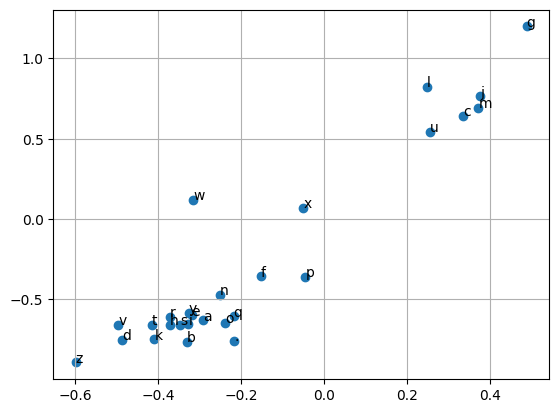

In [224]:
import matplotlib.pyplot as plt
x = C.numpy()[:,0]
y = C.numpy()[:,1]
n = chars

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.grid()

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))